In [1]:
#packages
## data manipulation
import pandas as pd
import numpy as np
## data viz
import seaborn as sns
import matplotlib.pyplot as plt

/home/mascalmeida/miniconda3/envs/tetris/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# getting all results
## defining algo
algo_list = ['tetris', 'thea']
## defining 10 numbers for seed_list
seed_list = [428956419, 1954324947, 1145661099, 1835732737, 794161987, 1329531353, 200496737, 633816299, 1410143363, 1282538739]
## defining scenarios
scenario_list = ['1st_low_fast', '1st_low_slow', '1st_high_fast', '1st_high_slow']
## experiment matrix schema
### object to save the final matrix
dt_exp_matrix = pd.DataFrame(columns=['Experiment', 'Algorithm', 'Workload', 'Link Delay', 
                                      'Latency SLA Violation_mean', 'Delays_mean', 
                                      'Delays slas usage_mean', 'Drops_mean', 
                                      'Latency SLA Violation_std', 'Delays_std', 
                                      'Delays slas usage_std', 'Drops_std'])
### object to save the total of experiments
dt_exp_matrix_total = pd.DataFrame(columns=['Experiment', 'Algorithm', 'Workload', 'Link Delay', 
                                            'Latency SLA Violation', 'Delays', 'Delays slas usage', 'Drops'])
### object to count the quantity of experiments
n_exp = 0
# loop to get results
for algo_name in algo_list:

    for scenario in scenario_list:
        ## count experiment
        n_exp = n_exp + 1
        ## object to get results from all seeds
        dt_all_seeds = pd.DataFrame(columns=['Latency SLA Violation', 'Delays', 'Delays slas usage', 'Drops'])
        ## print the experiment
        print(f"Exp.{n_exp}: {algo_name}_{scenario}")

        for seed_value in seed_list:
            
            ### getting results by seeds
            dt_individual = pd.read_csv(f"results/{algo_name}_{scenario}_{seed_value}.csv")
            dt_individual_seed = pd.DataFrame(dt_individual.loc[:, ['Delays', 'Delays slas usage']].mean()).T
            dt_individual_seed['Drops'] = dt_individual.loc[:, 'Drop'].sum()
            dt_individual_seed['Latency SLA Violation'] = dt_individual.loc[:, 'Latency SLA Violation'].sum()
            dt_individual_seed = dt_individual_seed.loc[:, dt_all_seeds.columns]
            ### save results of all seeds for each experiment
            dt_all_seeds = pd.concat([dt_all_seeds, dt_individual_seed])
            
        ## save all experiments results
        dt_all_seeds_total = dt_all_seeds.reset_index(drop=True)
        dt_all_seeds_total['Experiment'] = n_exp
        dt_all_seeds_total['Algorithm'] = algo_name
        dt_all_seeds_total['Workload'] = scenario.split('_')[1]
        if scenario.split('_')[2] == 'fast':
            dt_all_seeds_total['Link Delay'] = 5
        elif scenario.split('_')[2] == 'slow':
            dt_all_seeds_total['Link Delay'] = 10
        dt_all_seeds_total = dt_all_seeds_total.loc[:, dt_exp_matrix_total.columns]
        ### final object to save all experiments
        dt_exp_matrix_total = pd.concat([dt_exp_matrix_total, dt_all_seeds_total], axis=0).reset_index(drop=True)
        
        ## with the avg and std values create experiment matrix
        ### mean values
        mean_columns_name = pd.DataFrame(dt_all_seeds.mean()).T.columns + '_mean'        
        dt_seeds_mean = pd.DataFrame(dt_all_seeds.mean()).T
        dt_seeds_mean.columns = mean_columns_name
        ### std values
        std_columns_name = pd.DataFrame(dt_all_seeds.std()).T.columns + '_std'        
        dt_seeds_std = pd.DataFrame(dt_all_seeds.std()).T
        dt_seeds_std.columns = std_columns_name
        ### concat mean and std results
        dt_seeds_mean_std = pd.concat([dt_seeds_mean, dt_seeds_std], axis=1)
        dt_seeds_mean_std['Experiment'] = n_exp
        dt_seeds_mean_std['Algorithm'] = algo_name
        dt_seeds_mean_std['Workload'] = scenario.split('_')[1]
        if scenario.split('_')[2] == 'fast':
            dt_seeds_mean_std['Link Delay'] = 5
        elif scenario.split('_')[2] == 'slow':
            dt_seeds_mean_std['Link Delay'] = 10
        ### final object to save the exp matrix
        dt_exp_matrix = pd.concat([dt_exp_matrix, dt_seeds_mean_std], axis=0).reset_index(drop=True)

Exp.1: tetris_1st_low_fast
Exp.2: tetris_1st_low_slow
Exp.3: tetris_1st_high_fast
Exp.4: tetris_1st_high_slow
Exp.5: thea_1st_low_fast
Exp.6: thea_1st_low_slow
Exp.7: thea_1st_high_fast
Exp.8: thea_1st_high_slow


/tmp/ipykernel_9771/3482306693.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dt_all_seeds = pd.concat([dt_all_seeds, dt_individual_seed])
/tmp/ipykernel_9771/3482306693.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dt_exp_matrix_total = pd.concat([dt_exp_matrix_total, dt_all_seeds_total], axis=0).reset_index(drop=True)
/tmp/ipykernel_9771/3482306693.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this wi

In [3]:
# check the data type
numeric_columns = ['Latency SLA Violation', 'Delays', 
                   'Delays slas usage', 'Drops']
for column in numeric_columns:
    dt_exp_matrix_total[column] = dt_exp_matrix_total[column].astype(np.float64).round(decimals=2)

numeric_columns = ['Latency SLA Violation_mean', 'Delays_mean', 
                   'Delays slas usage_mean', 'Drops_mean', 
                   'Latency SLA Violation_std', 'Delays_std',
                   'Delays slas usage_std', 'Drops_std']
for column in numeric_columns:
    dt_exp_matrix[column] = dt_exp_matrix[column].astype(np.float64).round(decimals=2)

# remove usage column
table_to_paper = dt_exp_matrix.drop(columns=['Delays slas usage_mean', 'Delays slas usage_std'])
# save table
table_to_paper.to_csv('table_to_paper.csv', index=False)
table_to_paper.loc[:, ['Latency SLA Violation_mean', 'Drops_mean', 'Delays_mean']].to_csv('data_for_plots.csv', index=False)
display(table_to_paper, dt_exp_matrix_total)

,Experiment,Algorithm,Workload,Link Delay,Latency SLA Violation_mean,Delays_mean,Drops_mean,Latency SLA Violation_std,Delays_std,Drops_std
0,1,tetris,low,5,13.4,16.13,0.0,6.48,3.67,0.00
1,2,tetris,low,10,18.6,27.77,0.0,6.92,5.28,0.00
2,3,tetris,high,5,12.5,15.83,0.0,4.95,1.11,0.00
3,4,tetris,high,10,24.7,31.67,0.0,5.14,2.72,0.00
4,5,thea,low,5,14.2,13.90,0.0,6.43,0.87,0.00
5,6,thea,low,10,35.1,27.18,0.0,6.23,1.81,0.00
6,7,thea,high,5,118.9,14.60,1.4,56.50,0.70,0.52
7,8,thea,high,10,253.0,29.60,1.4,39.16,1.58,0.52


,Experiment,Algorithm,Workload,Link Delay,Latency SLA Violation,Delays,Delays slas usage,Drops
0,1,tetris,low,5,11.0,11.07,88.51,0.0
1,1,tetris,low,5,17.0,20.00,136.70,0.0
2,1,tetris,low,5,10.0,18.10,160.27,0.0
3,1,tetris,low,5,11.0,11.67,89.83,0.0
4,1,tetris,low,5,17.0,19.64,278.68,0.0
...,...,...,...,...,...,...,...,...
75,8,thea,high,10,285.0,28.00,261.90,1.0
76,8,thea,high,10,225.0,30.00,186.46,2.0
77,8,thea,high,10,280.0,28.00,298.94,1.0
78,8,thea,high,10,280.0,32.00,202.75,1.0


In [4]:
dt_final = table_to_paper.groupby(by='Algorithm').mean(numeric_only=True).round(decimals=2).reset_index()

values_to_paper = pd.DataFrame(columns=['response_var', 'only_mean', 'best_case', 'worst_case'])

for var_name in ['Latency SLA Violation', 'Drops', 'Delays']:

    tetris_mean = dt_final.loc[dt_final['Algorithm'] == 'tetris', f'{var_name}_mean'].values[0]
    thea_mean = dt_final.loc[dt_final['Algorithm'] == 'thea', f'{var_name}_mean'].values[0]
    tetris_std = dt_final.loc[dt_final['Algorithm'] == 'tetris', f'{var_name}_std'].values[0]
    thea_std = dt_final.loc[dt_final['Algorithm'] == 'thea', f'{var_name}_std'].values[0]

    only_mean = (100 - ((tetris_mean*100)/thea_mean))
    best_case = (100 - (((tetris_mean-tetris_std)*100)/(thea_mean+thea_std)))
    worst_case = (100 - (((tetris_mean+tetris_std)*100)/(thea_mean-thea_std)))

    new_row = pd.DataFrame([var_name, only_mean, best_case, worst_case]).T
    new_row.columns = ['response_var', 'only_mean', 'best_case', 'worst_case']
    values_to_paper = pd.concat([values_to_paper, new_row]).reset_index(drop=True)

# check the data type
numeric_columns = ['only_mean', 'best_case', 'worst_case']
for column in numeric_columns:
    values_to_paper[column] = values_to_paper[column].astype(np.float64).round(decimals=2)

# add total row
total_row = pd.DataFrame(values_to_paper.mean(numeric_only=True)).T
total_row['response_var'] = 'total'
total_row = total_row.loc[:, values_to_paper.columns]
values_to_paper = pd.concat([values_to_paper, total_row]).reset_index(drop=True)

# check the data type
numeric_columns = ['only_mean', 'best_case', 'worst_case']
for column in numeric_columns:
    values_to_paper[column] = values_to_paper[column].astype(np.float64).round(decimals=2)

values_to_paper.to_csv('values_to_paper.csv', index=False)

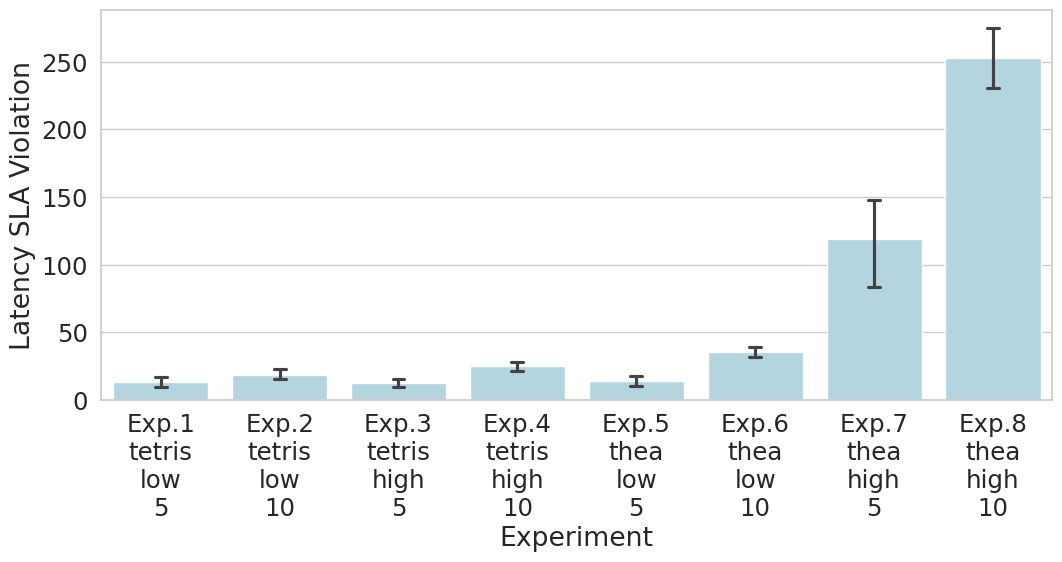

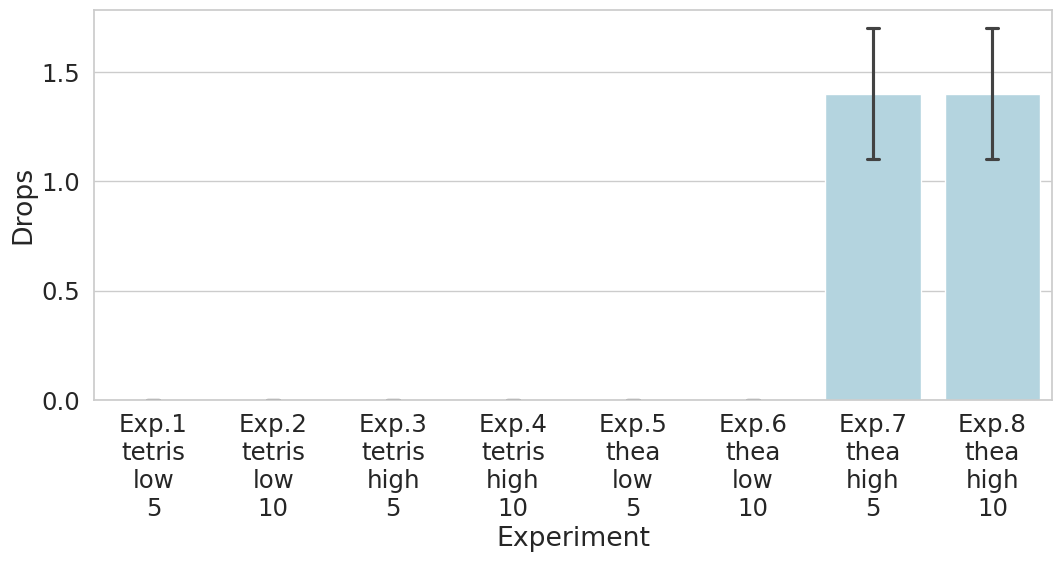

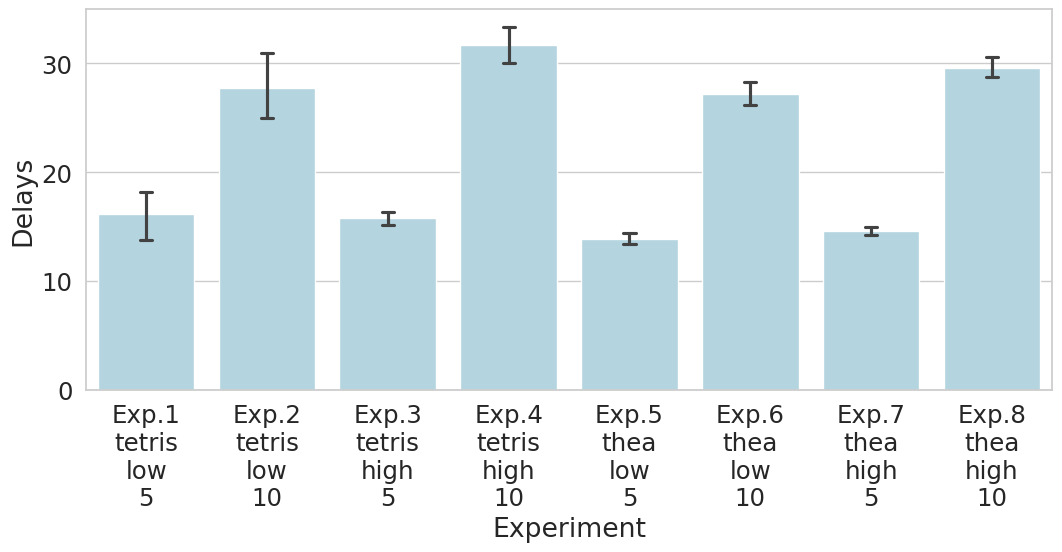

In [5]:
# list of response variables
y_list = ['Latency SLA Violation', 'Drops', 'Delays']
# Bar plot by experiment
for y_name in y_list:
    ## Set the figure size
    sns.set(style="whitegrid", font_scale=1.6)
    plt.figure(figsize=(11, 6))
    ## plot a bar chart
    ax = sns.barplot(x="Experiment", y=y_name, data=dt_exp_matrix_total, 
                    estimator=np.mean, errorbar=('ci', 95), capsize=.1, 
                    color='lightblue', width=0.8)
    ## set x label
    ax.set_xticks(range(len(dt_exp_matrix)), labels=['Exp.1\ntetris:low:5', 'Exp.2\ntetris:low:10', 
                                                    'Exp.3\ntetris:high:5', 'Exp.4\ntetris:high:10',
                                                    'Exp.5\nthea:low:5', 'Exp.6\nthea:low:10', 
                                                    'Exp.7\nthea:high:5', 'Exp.8\nthea:high:10'])
    
    ax.set_xticks(range(len(dt_exp_matrix)), labels=['Exp.1\ntetris\nlow\n5', 'Exp.2\ntetris\nlow\n10', 
                                                    'Exp.3\ntetris\nhigh\n5', 'Exp.4\ntetris\nhigh\n10',
                                                    'Exp.5\nthea\nlow\n5', 'Exp.6\nthea\nlow\n10', 
                                                    'Exp.7\nthea\nhigh\n5', 'Exp.8\nthea\nhigh\n10'])
    
    plt.tight_layout()
    plt.savefig(f"plots/exp_by_{y_name}.png", dpi=300)
    plt.savefig(f"plots/exp_by_{y_name}.pdf", format='pdf')
    plt.show()

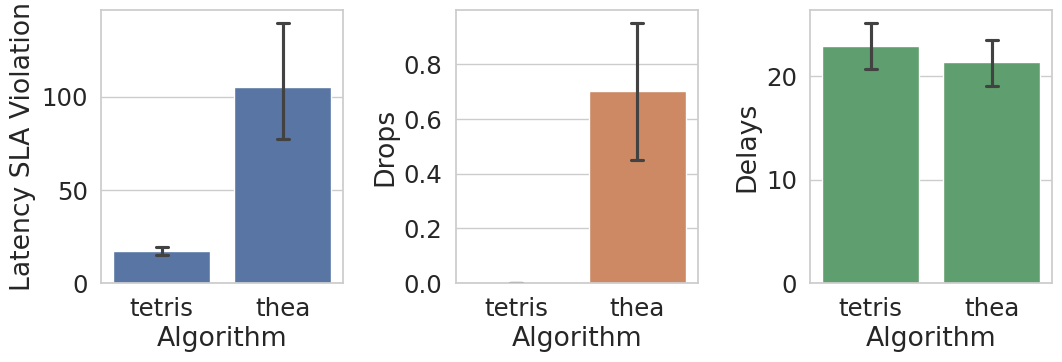

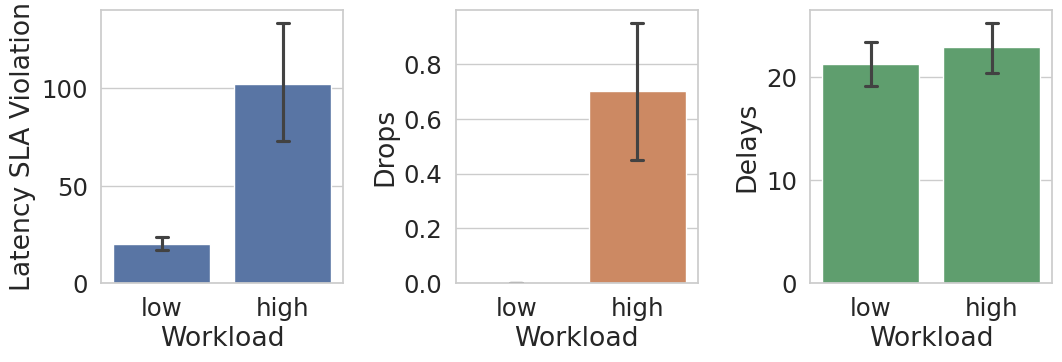

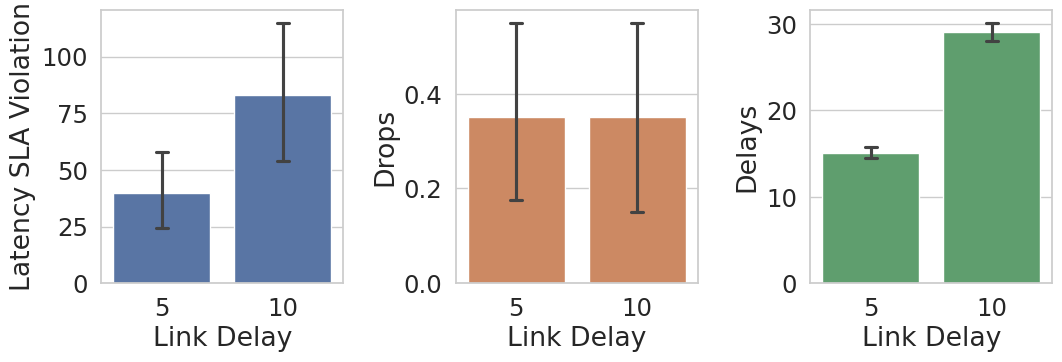

In [6]:
# list of response variables
y_list = ['Latency SLA Violation', 'Drops', 'Delays']
# Bar plot by factor
# Defining a color list for the response variables
colors = ['cyan', 'skyblue', 'salmon', 'lightgreen', 'violet', 'gold', 'violet', 'lightgrey', 'orange', 'cyan']
## loop to get all factors
factor_list = ['Algorithm', 'Workload', 'Link Delay']
for factor_name in factor_list:
    ### Set the figure size
    sns.set(style="whitegrid", font_scale=1.6)
    fig, axs = plt.subplots(ncols=3, figsize=(11, 4))
    ### loop to create plots
    for i in range(len(y_list)):
        y_name = y_list[i]
        sns.barplot(x=factor_name, y=y_name, data=dt_exp_matrix_total, 
                    estimator=np.mean, errorbar=('ci', 95), capsize=.1, 
                    color=sns.color_palette()[i], width=0.8, ax=axs[i])
    
    plt.tight_layout()
    plt.savefig(f"plots/{factor_name}_by_reponsevars.png", dpi=300)
    plt.savefig(f"plots/{factor_name}_by_reponsevars.pdf", format='pdf')
    plt.show()